# 衣手包辦
### <font color=0C8A3A> $\;\;\;\;\;\;$<font color=F54533> "如何根據當日氣溫做出正確的穿搭選擇"</font> 相信是大家每天要思考的問題，此程式可讓使用者先輸入衣櫃的資訊(包含上衣跟下著以及它們適合穿著時的氣溫範圍)，程式將會自動擷取氣象局資料，然後從衣櫃資料庫中幫使用者找出適合的穿著組合!!! <font color=F54533>將大幅減少早上傷腦筋找衣服的時間!!! </font>相信可以幫助到許多衣櫃收納較不整齊的人~~~快接下去參觀這個程式吧 </font> 

# <font color=FC8600> 一、擷取中央氣象局的溫度資料 </font> 
  ###  <font color=1978DD>  $\;\;\;\;\;\;$  資料地區為台北市 內容是當日氣溫預測 </font>

In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import locale

import matplotlib.pyplot as plt
#plt.rcParams['font.sans-serif']=['SimHei']
#plt.rcParams['axes.unicode_minus']=False

df = pd.read_html('https://www.cwb.gov.tw/V7/forecast/taiwan/Taipei_City.htm')
df_chart=df[0]
df_chart.head()

,臺北市,溫度 (℃),天氣狀況,舒適度,降雨機率 (%)
0,今晚至明晨 04/19 00:00~04/19 06:00,22 ~ 24,NaN,舒適,10 %
1,明日白天 04/19 06:00~04/19 18:00,22 ~ 29,NaN,舒適至悶熱,70 %
2,明日晚上 04/19 18:00~04/20 06:00,23 ~ 27,NaN,舒適,70 %


###  <font color=1978DD>  $\;\;\;\;\;\;$ 擷取溫度數據 </font>

In [9]:
df_date_weather=df_chart[0:]
dfCopy= df_date_weather.loc[:,[ '溫度 (℃)']].copy()
tempRange = dfCopy['溫度 (℃)']
tempRange

0    22 ~ 24
1    22 ~ 29
2    23 ~ 27
Name: 溫度 (℃), dtype: object

###  <font color=1978DD>  $\;\;\;\;\;\;$ 計算溫差(取出最大值和最小值) </font>

In [10]:
temps = np.zeros((3,2));
for i in range(3):
    temp=tempRange[i].split("~",1)
    for j in range(2):
        temps[i,j]=int(temp[j])
temps
maxTemp=np.max(temps)
minTemp=np.min(temps)
minTemp,maxTemp

(22.0, 29.0)

# <font color=FC8600> 二、建立衣服的資料 (適用溫度範圍,可對應搭配的下半身衣服照片編碼) </font> 
###  <font color=1978DD>  $\;\;\;\;\;\;$ 例如shirt[3] = [[18,26],[2,3]]表示3號上衣適合穿的溫度是攝氏18~26度，可搭配的下半衣著是2號及3號，以此類推。 </font>

In [11]:
shirt=[ [None] *3  for i in range(11) ]
shirt[0] = [[27,35],[1,4]]
shirt[1] = [[27,35],[2]]
shirt[2] = [[10,18],[2,3]]
shirt[3] = [[18,26],[2,3]]
shirt[4] = [[27,35],[4,5]]
shirt[5] = [[27,35],[1,2]]
shirt[6] = [[10,18],[2]]
shirt[7] = [[18,26],[3,6]]
shirt[8] = [[10,18],[2]]      
shirt[9] = [[18,26],[6]]      
shirt[10] = [[18,26],[3,6]]
shirt

[[[27, 35], [1, 4]],
 [[27, 35], [2]],
 [[10, 18], [2, 3]],
 [[18, 26], [2, 3]],
 [[27, 35], [4, 5]],
 [[27, 35], [1, 2]],
 [[10, 18], [2]],
 [[18, 26], [3, 6]],
 [[10, 18], [2]],
 [[18, 26], [6]],
 [[18, 26], [3, 6]]]

# <font color=FC8600> 三、根據溫度資料找出適合的上衣</font> 

In [12]:
## for test
#minTemp=15
#maxTemp=18

###  <font color=1978DD>  把網站溫度和使用者輸入的各衣服適合溫度相連結，找出完全交集或是至少有重疊3攝氏度的上衣，就可選為當日適合穿的衣服 </font>

In [13]:
shirt_chosen=[]
for i in range(11):
    low_ctemp = shirt[i][0][0]
    high_ctemp = shirt[i][0][1]
    if minTemp>=low_ctemp and maxTemp<=high_ctemp:
        shirt_chosen.append(i)
    elif minTemp<=low_ctemp and maxTemp-low_ctemp>=3:
        shirt_chosen.append(i)
    elif maxTemp>=high_ctemp and high_ctemp-minTemp>=3:
        shirt_chosen.append(i)
shirt_chosen
            

[3, 7, 9, 10]

# <font color=FC8600> 四、根據上衣搭配的資料找出適合的下著</font> 
###  <font color=1978DD>  $\;\;\;\;\;\;$ 程式自動找出所有適合的組合之後，將衣服的照片列出，使用者就可以輕鬆選衣服出門囉~ </font>
###  <font color=1978DD>  $\;\;\;\;\;\;$ 垂直方向的兩兩圖片代表是一套上+下的穿法，使用者再自行從這幾種穿法去挑自己喜歡的就ok </font>
###  <font color=1978DD>  $\;\;\;\;\;\;$ 可以在上面的測試區kernel嘗試輸入不同的當日最高溫與最低溫，程式就會馬上重新找出最適合的衣服穿法喔 </font>

3 2
3 3
7 3
7 6
9 6
10 3
10 6


<Figure size 432x288 with 0 Axes>

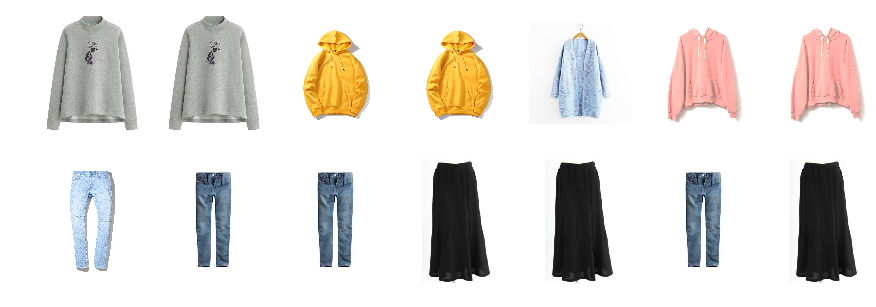

In [14]:
from PIL import Image

imgs_up=[]
imgs_low=[]
col=0
total=0
for i in shirt_chosen:
    for j in shirt[i][1]:
        imgs_up.append(Image.open(str(i)+'.jpg'))   #上衣
        imgs_low.append(Image.open('p_'+str(j)+'.jpg')) #下著
        total+=2
        col+=1
        print(i,j)

plt.figure()  
plt.subplots(2,col,figsize=(15,5))
for t in range (col):
    plt.subplot(2,col,t+1)   #  t+1=1-4
    plt.axis('off')
    plt.imshow(imgs_up[t])
        
for t in range (col+1,total+1): # 3-4 
    plt.subplot(2,col,t)   #  t+1=1-4
    plt.axis('off')
    plt.imshow(imgs_low[t-col-1])   # imgs_low[0-1]

### 衣服圖片的網址連結:
http://t.cn/EXBCRjg
http://t.cn/EXBCk2z
http://t.cn/EXBNZhW
http://t.cn/EXBNyhH
http://t.cn/EXBNtxx
http://t.cn/EXBNfqp
http://t.cn/EXBNiQC